In [2]:
# Loading important libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
# Loading processed data 
df = pd.read_csv("../data/processed/monthly_sales.csv")
df.head()


,YearMonth,Sales,Profit,Quantity,Discount,Year,Month,Sales_Lag_1,Sales_Lag_2,Sales_Lag_3,Sales_Rolling_3
0,2014-04-01,28295.3450,3488.8352,536,0.110000,2014,4,55691.0090,4519.8920,14236.895,29502.082000
1,2014-05-01,23648.2870,2738.7096,466,0.155328,2014,5,28295.3450,55691.0090,4519.892,35878.213667
2,2014-06-01,34595.1276,4976.5244,521,0.172000,2014,6,23648.2870,28295.3450,55691.009,28846.253200
3,2014-07-01,33946.3930,-841.4826,550,0.171678,2014,7,34595.1276,23648.2870,28295.345,30729.935867
4,2014-08-01,27909.4685,5318.1050,609,0.131046,2014,8,33946.3930,34595.1276,23648.287,32150.329700


In [4]:
# Define Target
y = df['Sales']


In [5]:
# Definning Features
X = df.drop(columns=['Sales', 'YearMonth'])


In [6]:
# Train-Time Split (Time-Aware)
train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]


In [7]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [8]:
# Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(3.395446886618932e-11, np.float64(3.8956394817333324e-11), 1.0)

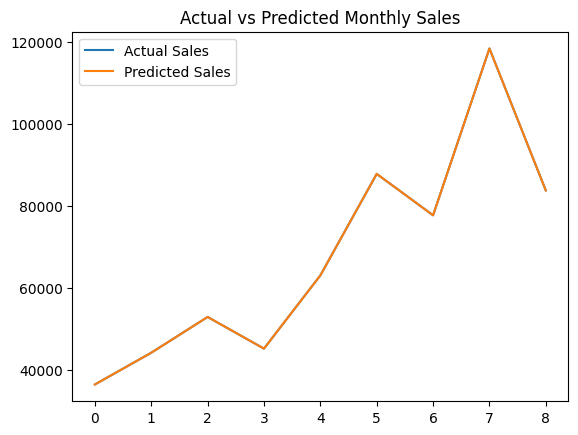

In [10]:
# Visual Check
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Monthly Sales")
plt.show()


In [11]:
# Saving the models
import joblib

joblib.dump(model, "../models/sales_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']

In [12]:
# Interpreting the Model
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
8,Sales_Rolling_3,4.220299e+04
4,Month,3.092282e-11
0,Profit,2.156398e-11
2,Discount,1.500666e-11
7,Sales_Lag_3,9.549694e-12
3,Year,7.503331e-12
1,Quantity,3.637979e-12
5,Sales_Lag_1,-2.183909e+04
6,Sales_Lag_2,-2.247377e+04


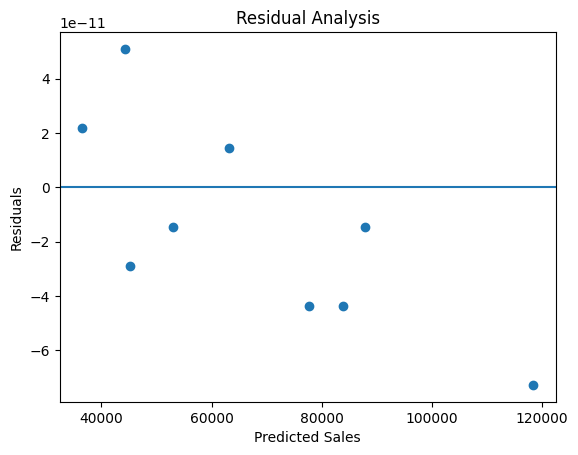

In [ ]:
# Residual Analysis (Random scatter = good model and Patterns = missing features)
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


In [15]:
# Baseline Comparison (professional touch)
baseline_pred = np.repeat(y_train.mean(), len(y_test))
baseline_mae = mean_absolute_error(y_test, baseline_pred)

baseline_mae


24946.822036728398

In [16]:
# Freeze feature order
feature_names = list(X.columns)

joblib.dump(feature_names, "../models/feature_names.pkl")


['../models/feature_names.pkl']